# Kornia motion blur kernel example

In [43]:
%matplotlib inline
import torch
import numpy as np
import random
from kornia.filters.motion import MotionBlur, get_motion_kernel2d
import matplotlib.pyplot as plt
import PIL.Image as Image
from torchvision import transforms, datasets

plt.rcParams['figure.figsize'] = [18, 18]
torch.set_printoptions(precision=2)

In [7]:
'''
def get_motion_kernel2d(
    kernel_size: int,
    angle: Union[torch.Tensor, float],
    direction: Union[torch.Tensor, float] = 0.0,
    mode: str = 'nearest',
) -> torch.Tensor:
'''

"\ndef get_motion_kernel2d(\n    kernel_size: int,\n    angle: Union[torch.Tensor, float],\n    direction: Union[torch.Tensor, float] = 0.0,\n    mode: str = 'nearest',\n) -> torch.Tensor:\n"

## Angle (0, 360)

get_motion_kernel2d(5, 0., 0.)
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]


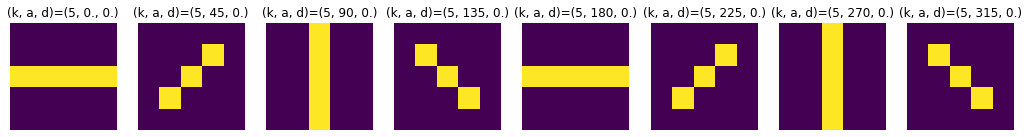

In [8]:
print('get_motion_kernel2d(5, 0., 0.)')
print(get_motion_kernel2d(5, 0., 0.).numpy()[0])
plt.subplot(1, 8, 1).set_title(f'(k, a, d)=(5, 0., 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 0., 0.).numpy()[0])

plt.subplot(1, 8, 2).set_title(f'(k, a, d)=(5, 45, 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 45, 0.).numpy()[0])

plt.subplot(1, 8, 3).set_title(f'(k, a, d)=(5, 90, 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 90, 0.).numpy()[0])

plt.subplot(1, 8, 4).set_title(f'(k, a, d)=(5, 135, 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 135, 0.).numpy()[0])

plt.subplot(1, 8, 5).set_title(f'(k, a, d)=(5, 180, 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 180., 0.).numpy()[0])

plt.subplot(1, 8, 6).set_title(f'(k, a, d)=(5, 225, 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 225, 0.).numpy()[0])

plt.subplot(1, 8, 7).set_title(f'(k, a, d)=(5, 270, 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 270, 0.).numpy()[0])

plt.subplot(1, 8, 8).set_title(f'(k, a, d)=(5, 315, 0.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 315, 0.).numpy()[0])

## Direction (0, 360)

get_motion_kernel2d(5, 0., 0.5.)
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]


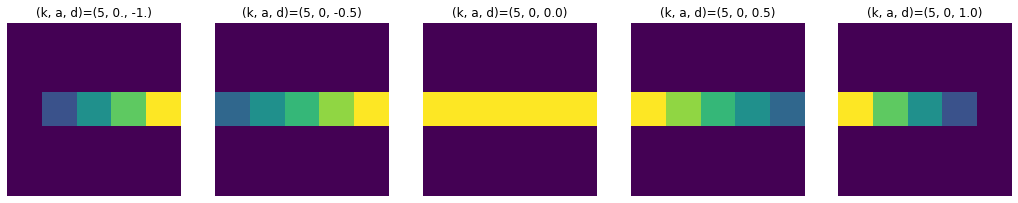

In [39]:
print('get_motion_kernel2d(5, 0., 0.5.)')
print(get_motion_kernel2d(5, 0., 0.).numpy()[0])
plt.subplot(1, 5, 1).set_title(f'(k, a, d)=(5, 0., -1.)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 0., -1.).numpy()[0])

plt.subplot(1, 5, 2).set_title(f'(k, a, d)=(5, 0, -0.5)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 0, -0.5).numpy()[0])

plt.subplot(1, 5, 3).set_title(f'(k, a, d)=(5, 0, 0.0)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 0, 0.).numpy()[0])

plt.subplot(1, 5, 4).set_title(f'(k, a, d)=(5, 0, 0.5)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 0, 0.5).numpy()[0])

plt.subplot(1, 5, 5).set_title(f'(k, a, d)=(5, 0, 1.0)'); plt.axis('off')
plt.imshow(get_motion_kernel2d(5, 0, 1.0).numpy()[0])

(786, 787) (80, 80)


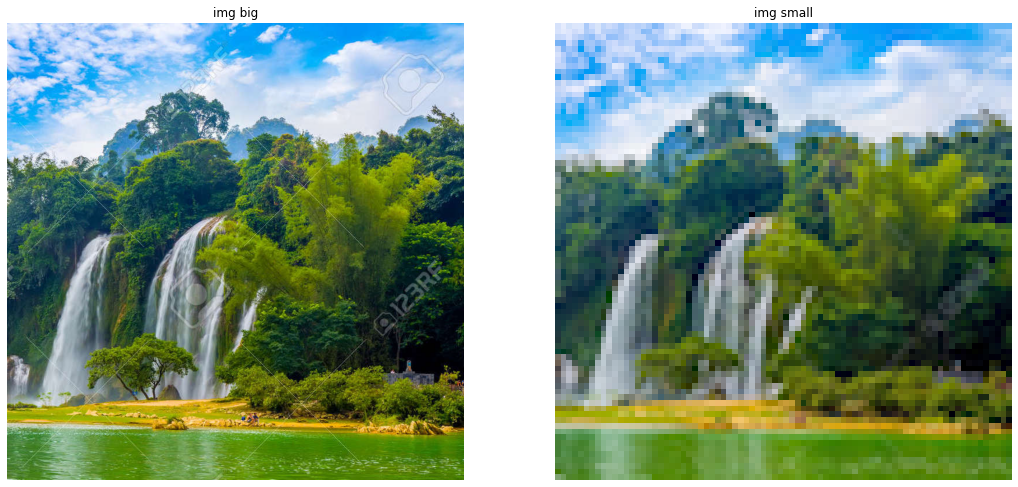

In [88]:
imgbig = Image.open('/ssd1t/samsungisp/scene.jpeg')
imgsmall = Image.open('/ssd1t/samsungisp/scene80.png')
print(imgbig.size, imgsmall.size)

# plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(1, 2, 1).set_title(f'img big'); plt.axis('off')
plt.imshow(imgbig)
plt.subplot(1, 2, 2).set_title(f'img small'); plt.axis('off')
plt.imshow(imgsmall)

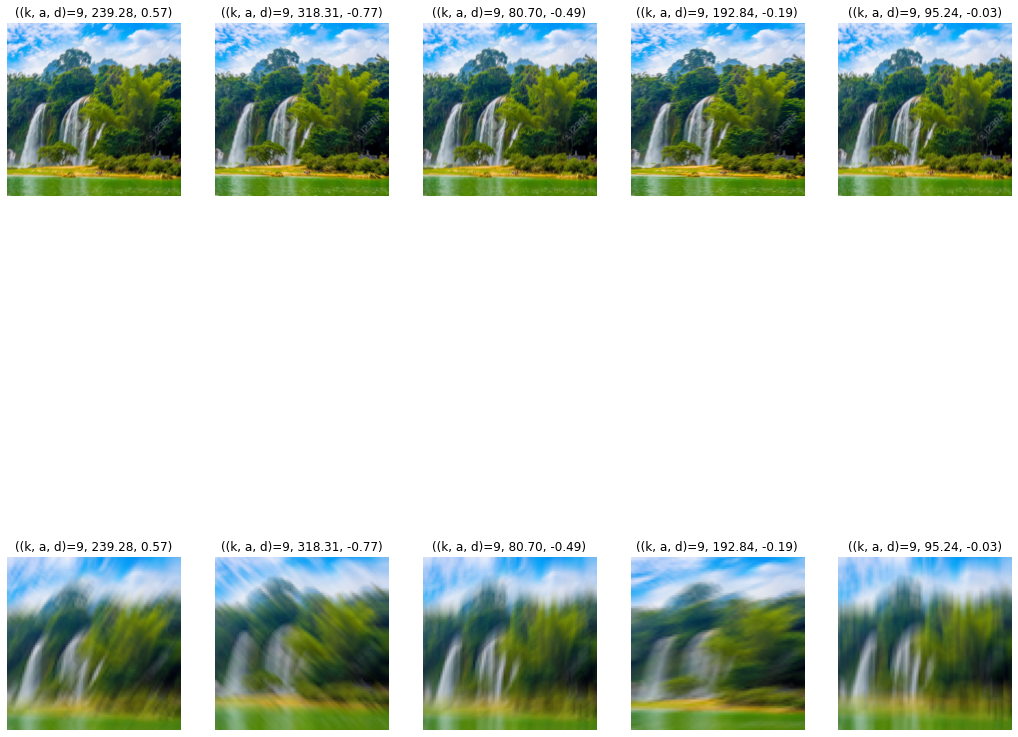

In [97]:
data_transform = transforms.Compose([transforms.ToTensor()])
imgbig = Image.open('/ssd1t/samsungisp/scene.jpeg')
imgsmall = Image.open('/ssd1t/samsungisp/scene80.png')
imgbig = data_transform(imgbig).unsqueeze(0)
imgsmall = data_transform(imgsmall).unsqueeze(0)


for i in range(5):
    rand_angle = random.uniform(0, 360)
    rand_direction = random.uniform(-1, 1)
    blur_kernel = MotionBlur(kernel_size=9, angle=rand_angle, direction=rand_direction, border_type='replicate')
    blurred_big = blur_kernel(imgbig)
    blurred_small = blur_kernel(imgsmall)
    plt.subplot(2, 5, i + 1).set_title(f'((k, a, d)=9, {rand_angle:.2f}, {rand_direction:.2f})'); plt.axis('off')
    plt.imshow(blurred_big.squeeze(0).permute(1, 2, 0))
    plt.subplot(2, 5, i + 6).set_title(f'((k, a, d)=9, {rand_angle:.2f}, {rand_direction:.2f})'); plt.axis('off')
    plt.imshow(blurred_small.squeeze(0).permute(1, 2, 0))